In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
df = pd.read_excel('Data_Train.xlsx')

In [93]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [95]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

total number of flight companies 

In [96]:
len(df['Airline'].unique())

12

there are 44 unique dates

In [97]:
len(df['Date_of_Journey'].unique())

44

In [98]:
df['Date_of_Journey'].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [99]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [100]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [101]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [102]:
df[df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [103]:
df[df['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [104]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [105]:
df.drop(index=9039, inplace=True)

In [106]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [107]:
df.size

117502

In [108]:
df['Total_Stops'] = df['Total_Stops'].str.replace(' stops', '')

In [109]:
df['Total_Stops'] = df['Total_Stops'].str.replace(' stop', '')

In [110]:
df['Total_Stops'] = df['Total_Stops'].str.replace('non-stop', '0')

In [111]:
df['Total_Stops'].head(20)

0     0
1     2
2     2
3     1
4     1
5     0
6     1
7     1
8     1
9     1
10    1
11    0
12    0
13    1
14    0
15    2
16    1
17    1
18    2
19    1
Name: Total_Stops, dtype: object

In [112]:
df['Total_Stops'] = df['Total_Stops'].astype(int)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  int32 
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int32(1), int64(1), object(9)
memory usage: 959.7+ KB


In [114]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302


In [115]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [116]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [117]:
df['Source'] = df['Source'].map({'Banglore':0, 'Kolkata':1, 'Delhi':3, 'Chennai':4, 'Mumbai':5 })

In [118]:
df['Source']

0        0
1        1
2        3
3        1
4        0
        ..
10678    1
10679    1
10680    0
10681    0
10682    3
Name: Source, Length: 10682, dtype: int64

In [119]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [120]:
df['Destination'] = df['Destination'].str.replace('New Delhi' , 'Delhi')

In [121]:
df['Destination'] = df['Destination'].map({'Banglore':0, 'Delhi':3, 'Kolkata':1, 'Cochin':6, 'Hyderabad':7 })
df['Destination'].head()

0    3
1    0
2    6
3    0
4    3
Name: Destination, dtype: int64

In [122]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,0,3,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,1/05/2019,1,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,9/06/2019,3,6,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,12/05/2019,1,0,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,01/03/2019,0,3,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302


In [123]:
df['Journey_month'] = df['Date_of_Journey'].str.split('/').str[1]
df['Journey_day'] = df['Date_of_Journey'].str.split('/').str[0]
df['Journey_year'] = df['Date_of_Journey'].str.split('/').str[2]

In [124]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Journey_year
0,IndiGo,24/03/2019,0,3,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,03,24,2019
1,Air India,1/05/2019,1,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,05,1,2019
2,Jet Airways,9/06/2019,3,6,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,06,9,2019
3,IndiGo,12/05/2019,1,0,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,05,12,2019
4,IndiGo,01/03/2019,0,3,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,03,01,2019


In [125]:
df.drop('Date_of_Journey', axis=1, inplace=True)

In [126]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [127]:
df['Journey_month'] = df['Journey_month'].astype(int)
df['Journey_day'] = df['Journey_day'].astype(int) 
df['Journey_year'] = df['Journey_year'].astype(int)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  int64 
 2   Destination      10682 non-null  int64 
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  object
 7   Total_Stops      10682 non-null  int32 
 8   Additional_Info  10682 non-null  object
 9   Price            10682 non-null  int64 
 10  Journey_month    10682 non-null  int32 
 11  Journey_day      10682 non-null  int32 
 12  Journey_year     10682 non-null  int32 
dtypes: int32(4), int64(3), object(6)
memory usage: 1001.4+ KB


In [129]:
df['Arrival_h'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]
df['Arrival_m'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]

In [130]:
df.drop('Arrival_Time', axis=1, inplace=True)

In [131]:
df.head(10)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Journey_year,Arrival_h,Arrival_m
0,IndiGo,0,3,BLR → DEL,22:20,2h 50m,0,No info,3897,3,24,2019,01,10
1,Air India,1,0,CCU → IXR → BBI → BLR,05:50,7h 25m,2,No info,7662,5,1,2019,13,15
2,Jet Airways,3,6,DEL → LKO → BOM → COK,09:25,19h,2,No info,13882,6,9,2019,04,25
3,IndiGo,1,0,CCU → NAG → BLR,18:05,5h 25m,1,No info,6218,5,12,2019,23,30
4,IndiGo,0,3,BLR → NAG → DEL,16:50,4h 45m,1,No info,13302,3,1,2019,21,35
5,SpiceJet,1,0,CCU → BLR,09:00,2h 25m,0,No info,3873,6,24,2019,11,25
6,Jet Airways,0,3,BLR → BOM → DEL,18:55,15h 30m,1,In-flight meal not included,11087,3,12,2019,10,25
7,Jet Airways,0,3,BLR → BOM → DEL,08:00,21h 5m,1,No info,22270,3,1,2019,05,05
8,Jet Airways,0,3,BLR → BOM → DEL,08:55,25h 30m,1,In-flight meal not included,11087,3,12,2019,10,25
9,Multiple carriers,3,6,DEL → BOM → COK,11:25,7h 50m,1,No info,8625,5,27,2019,19,15


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  int64 
 2   Destination      10682 non-null  int64 
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Duration         10682 non-null  object
 6   Total_Stops      10682 non-null  int32 
 7   Additional_Info  10682 non-null  object
 8   Price            10682 non-null  int64 
 9   Journey_month    10682 non-null  int32 
 10  Journey_day      10682 non-null  int32 
 11  Journey_year     10682 non-null  int32 
 12  Arrival_h        10682 non-null  object
 13  Arrival_m        10682 non-null  object
dtypes: int32(4), int64(3), object(7)
memory usage: 1.1+ MB


In [133]:
df['Arrival_h'] = df['Arrival_h'].astype(int)
df['Arrival_m'] = df['Arrival_m'].astype(int)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  int64 
 2   Destination      10682 non-null  int64 
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Duration         10682 non-null  object
 6   Total_Stops      10682 non-null  int32 
 7   Additional_Info  10682 non-null  object
 8   Price            10682 non-null  int64 
 9   Journey_month    10682 non-null  int32 
 10  Journey_day      10682 non-null  int32 
 11  Journey_year     10682 non-null  int32 
 12  Arrival_h        10682 non-null  int32 
 13  Arrival_m        10682 non-null  int32 
dtypes: int32(6), int64(3), object(5)
memory usage: 1001.4+ KB


In [135]:
df['Dept_h'] = df['Dep_Time'].str.split(':').str[0]
df['Dept_m'] = df['Dep_Time'].str.split(':').str[1]
df['Dept_h'] = df['Dept_h'].astype(int)
df['Dept_m'] = df['Dept_m'].astype(int)

In [136]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Journey_year,Arrival_h,Arrival_m,Dept_h,Dept_m
0,IndiGo,0,3,BLR → DEL,22:20,2h 50m,0,No info,3897,3,24,2019,1,10,22,20
1,Air India,1,0,CCU → IXR → BBI → BLR,05:50,7h 25m,2,No info,7662,5,1,2019,13,15,5,50
2,Jet Airways,3,6,DEL → LKO → BOM → COK,09:25,19h,2,No info,13882,6,9,2019,4,25,9,25
3,IndiGo,1,0,CCU → NAG → BLR,18:05,5h 25m,1,No info,6218,5,12,2019,23,30,18,5
4,IndiGo,0,3,BLR → NAG → DEL,16:50,4h 45m,1,No info,13302,3,1,2019,21,35,16,50


In [137]:
df.drop('Dep_Time', axis=1, inplace=True)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  int64 
 2   Destination      10682 non-null  int64 
 3   Route            10682 non-null  object
 4   Duration         10682 non-null  object
 5   Total_Stops      10682 non-null  int32 
 6   Additional_Info  10682 non-null  object
 7   Price            10682 non-null  int64 
 8   Journey_month    10682 non-null  int32 
 9   Journey_day      10682 non-null  int32 
 10  Journey_year     10682 non-null  int32 
 11  Arrival_h        10682 non-null  int32 
 12  Arrival_m        10682 non-null  int32 
 13  Dept_h           10682 non-null  int32 
 14  Dept_m           10682 non-null  int32 
dtypes: int32(8), int64(3), object(4)
memory usage: 1001.4+ KB


In [139]:
df.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Journey_year,Arrival_h,Arrival_m,Dept_h,Dept_m
0,IndiGo,0,3,BLR → DEL,2h 50m,0,No info,3897,3,24,2019,1,10,22,20
1,Air India,1,0,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,5,1,2019,13,15,5,50
2,Jet Airways,3,6,DEL → LKO → BOM → COK,19h,2,No info,13882,6,9,2019,4,25,9,25
3,IndiGo,1,0,CCU → NAG → BLR,5h 25m,1,No info,6218,5,12,2019,23,30,18,5
4,IndiGo,0,3,BLR → NAG → DEL,4h 45m,1,No info,13302,3,1,2019,21,35,16,50
5,SpiceJet,1,0,CCU → BLR,2h 25m,0,No info,3873,6,24,2019,11,25,9,0
6,Jet Airways,0,3,BLR → BOM → DEL,15h 30m,1,In-flight meal not included,11087,3,12,2019,10,25,18,55
7,Jet Airways,0,3,BLR → BOM → DEL,21h 5m,1,No info,22270,3,1,2019,5,5,8,0
8,Jet Airways,0,3,BLR → BOM → DEL,25h 30m,1,In-flight meal not included,11087,3,12,2019,10,25,8,55
9,Multiple carriers,3,6,DEL → BOM → COK,7h 50m,1,No info,8625,5,27,2019,19,15,11,25


In [140]:
df.drop('Route', axis=1, inplace=True)

In [141]:
df.head(10)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Journey_year,Arrival_h,Arrival_m,Dept_h,Dept_m
0,IndiGo,0,3,2h 50m,0,No info,3897,3,24,2019,1,10,22,20
1,Air India,1,0,7h 25m,2,No info,7662,5,1,2019,13,15,5,50
2,Jet Airways,3,6,19h,2,No info,13882,6,9,2019,4,25,9,25
3,IndiGo,1,0,5h 25m,1,No info,6218,5,12,2019,23,30,18,5
4,IndiGo,0,3,4h 45m,1,No info,13302,3,1,2019,21,35,16,50
5,SpiceJet,1,0,2h 25m,0,No info,3873,6,24,2019,11,25,9,0
6,Jet Airways,0,3,15h 30m,1,In-flight meal not included,11087,3,12,2019,10,25,18,55
7,Jet Airways,0,3,21h 5m,1,No info,22270,3,1,2019,5,5,8,0
8,Jet Airways,0,3,25h 30m,1,In-flight meal not included,11087,3,12,2019,10,25,8,55
9,Multiple carriers,3,6,7h 50m,1,No info,8625,5,27,2019,19,15,11,25


In [142]:
import re
def convert_to_minutes(Duration):
    hours = 0
    minutes = 0
    
    if 'h' in Duration:
        hours = int(re.search(r'(\d+)h', Duration).group(1))
    
    if 'm' in Duration:
        minutes = int(re.search(r'(\d+)m', Duration).group(1))
    
    return hours * 60 + minutes

In [143]:
df['duration_minutes'] = df['Duration'].apply(convert_to_minutes)

In [144]:
df[['duration_minutes', 'Duration']]

,duration_minutes,Duration
0,170,2h 50m
1,445,7h 25m
2,1140,19h
3,325,5h 25m
4,285,4h 45m
...,...,...
10678,150,2h 30m
10679,155,2h 35m
10680,180,3h
10681,160,2h 40m


In [145]:
df.drop('Duration', axis=1, inplace=True)

In [146]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [147]:
df['Airline'] = le.fit_transform(df['Airline'])
df['Additional_Info'] = le.fit_transform(df['Additional_Info'])


In [148]:
df.head(10)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Journey_year,Arrival_h,Arrival_m,Dept_h,Dept_m,duration_minutes
0,3,0,3,0,8,3897,3,24,2019,1,10,22,20,170
1,1,1,0,2,8,7662,5,1,2019,13,15,5,50,445
2,4,3,6,2,8,13882,6,9,2019,4,25,9,25,1140
3,3,1,0,1,8,6218,5,12,2019,23,30,18,5,325
4,3,0,3,1,8,13302,3,1,2019,21,35,16,50,285
5,8,1,0,0,8,3873,6,24,2019,11,25,9,0,145
6,4,0,3,1,5,11087,3,12,2019,10,25,18,55,930
7,4,0,3,1,8,22270,3,1,2019,5,5,8,0,1265
8,4,0,3,1,5,11087,3,12,2019,10,25,8,55,1530
9,6,3,6,1,8,8625,5,27,2019,19,15,11,25,470


In [149]:
df[df['duration_minutes']<60]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Journey_year,Arrival_h,Arrival_m,Dept_h,Dept_m,duration_minutes
6474,1,5,7,2,8,17327,3,6,2019,16,55,16,50,5


In [150]:
df.drop(6474, axis=0, inplace=True)

In [151]:
df.shape

(10681, 14)

In [152]:
import seaborn as sns

outliers detection in prices 

<Axes: xlabel='Price'>

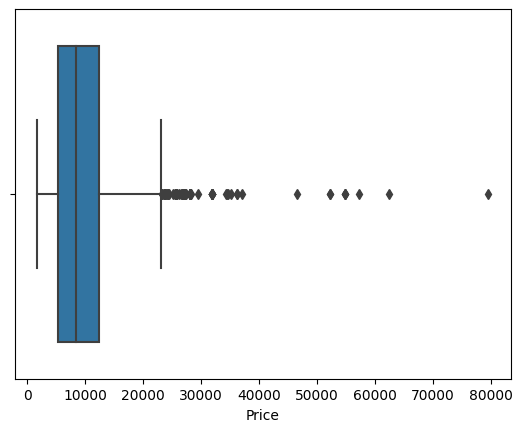

In [153]:
sns.boxplot(x=df['Price'])

<Axes: xlabel='Price', ylabel='Count'>

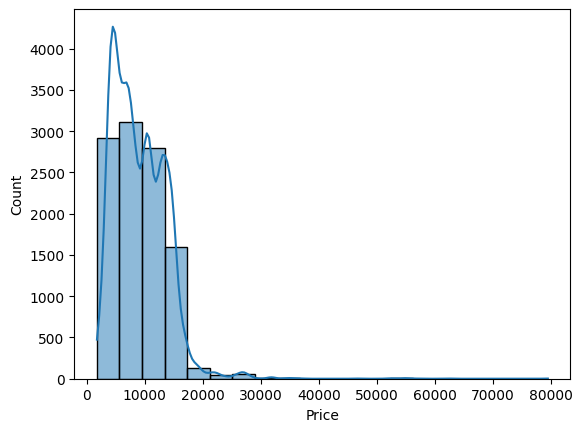

In [154]:
sns.histplot(data=df, x='Price', bins=20, kde=True)

1478, 2618, 5439

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Airline           10681 non-null  int32
 1   Source            10681 non-null  int64
 2   Destination       10681 non-null  int64
 3   Total_Stops       10681 non-null  int32
 4   Additional_Info   10681 non-null  int32
 5   Price             10681 non-null  int64
 6   Journey_month     10681 non-null  int32
 7   Journey_day       10681 non-null  int32
 8   Journey_year      10681 non-null  int32
 9   Arrival_h         10681 non-null  int32
 10  Arrival_m         10681 non-null  int32
 11  Dept_h            10681 non-null  int32
 12  Dept_m            10681 non-null  int32
 13  duration_minutes  10681 non-null  int64
dtypes: int32(10), int64(4)
memory usage: 834.5 KB


<Axes: xlabel='duration_minutes', ylabel='Count'>

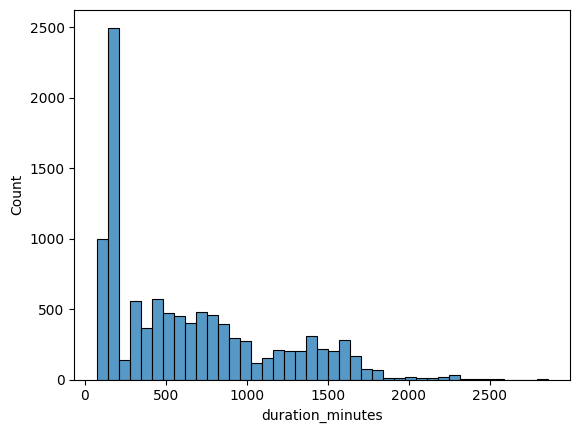

In [164]:
sns.histplot(data=df, x='duration_minutes')

In [175]:
df[(df['duration_minutes']>2000)]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Journey_year,Arrival_h,Arrival_m,Dept_h,Dept_m,duration_minutes
226,4,3,6,2,8,18799,3,3,2019,18,50,5,25,2245
470,4,3,6,2,8,13082,3,21,2019,4,25,18,20,2045
553,1,3,6,2,8,10598,3,9,2019,19,15,5,0,2295
919,1,1,0,3,8,10991,5,12,2019,23,15,12,0,2115
925,4,3,6,2,8,19907,3,6,2019,4,25,16,50,2135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9848,1,0,3,2,8,17135,3,1,2019,23,55,8,50,2345
10020,1,3,6,2,8,9653,5,9,2019,19,15,5,0,2295
10326,1,0,3,2,8,11791,3,3,2019,22,10,5,50,2420
10456,4,3,6,2,8,20694,3,6,2019,18,50,19,10,2860
